#manipulate_regonline_output

This notebook reads the RegOnline output into a pandas DataFrame and reworks it to have each row contain the attendee, the Doppler Primer Session, the Monday Breakout session, and the Tuesday breakout session in each row.

In [642]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib

### Read the RegOnline output into a pandas DataFrame

In [277]:
df = pd.read_excel('/Users/matt/projects/EPRV/data/AttendeeReportCrop.xls', encoding='utf-8')

In [278]:
df.columns

Index([u'AgendaItem', u'RegId', u'GroupId', u'FirstName', u'LastName', u'Company'], dtype='object')

In [281]:
df.loc[36:37]

,AgendaItem,RegId,GroupId,FirstName,LastName,Company
36,Doppler Primer: Instrumentation Challenges,79809251,79809251,Jason,Eastman,CfA
37,Doppler Primer: Not Attending,79200819,79200819,Michael,Endl,McDonald Observatory / University of Texas


### Extract the Sunday Sessions

RegOnline outputs multiple entries for each person, and each entry differs by the `AgendaItem`. `AgendaItem`s exist for all sessions happening on all days. In this section, we extract the sessions happening on Sunday, which are all prefixed by "Doppler Primer: ".

In [282]:
sundf = df[df['AgendaItem'].str.contains('Doppler Primer:')].copy()
len(sundf)

110

Let's create two new columns in our DataFrame: the `Primer`, and the `PrimerID`. The `Primer` column will contain the name of the Doppler Primer session (minus the `Doppler Primer: ` prefix), and the `PrimerID` will be a session identifier that will later be used in plotting.

In [283]:
sundf['PrimerID'] = 0

In [284]:
sundf['Primer'] = [re.search(r'(.*):\s(.*)$', item).group(2) for item in sundf['AgendaItem']]

In [285]:
sundf[['AgendaItem', 'Primer']].head(3)

,AgendaItem,Primer
0,Doppler Primer: Instrumentation Challenges,Instrumentation Challenges
1,Doppler Primer: Doppler code,Doppler code
2,Doppler Primer: Spot Modeling,Spot Modeling


In [621]:
sundf['Primer'].unique()

array([u'Instrumentation Challenges', u'Doppler code', u'Spot Modeling',
       u'Statistical Analysis', u'Not Attending'], dtype=object)

Now loop through the five unique sessions, updating the `PrimerID` column for each participant:

In [287]:
dopID = 0
for agItem in sundf['Primer'].unique():
    sundf.loc[sundf['Primer'] == agItem, 'PrimerID'] = dopID
    dopID += 1

Create an abbreviated code for each session. This will be added to the nametag to spark conversation among participants.

In [622]:
sun_ses = ['IC', 'DC', 'SM', 'SA', 'NA']

A quick preview of the first few rows to see the result:

In [288]:
sundf[['AgendaItem', 'Primer', 'PrimerID']].head(4)

,AgendaItem,Primer,PrimerID
0,Doppler Primer: Instrumentation Challenges,Instrumentation Challenges,0
1,Doppler Primer: Doppler code,Doppler code,1
2,Doppler Primer: Spot Modeling,Spot Modeling,2
3,Doppler Primer: Spot Modeling,Spot Modeling,2


### Extract the Monday Sessions

Now to do the same for the Monday sessions.

In [289]:
mondf = df[df['AgendaItem'].str.contains('Monday Break-out:')].copy()
len(mondf)

120

In [290]:
mondf['MonID'] = 0

mondf['Monday'] = [re.search(r'(.*):\s(.*)$', item).group(2) for item in mondf['AgendaItem']]

mondf['Monday'].unique()

monID = 0
for agItem in mondf['Monday'].unique():
    mondf.loc[mondf['Monday'] == agItem, 'MonID'] = monID
    monID += 1

In [619]:
mondf['Monday'].unique()

array([u'Fiber Optic Scrambling', u'Not attending',
       u'Telluric Contamination', u'Barycentric Corrections',
       u'Frequency Comb Calibrators'], dtype=object)

In [620]:
mon_ses = ['FS', 'NA', 'TC', 'BC', 'FC']

In [291]:
mondf[['AgendaItem', 'Monday', 'MonID']].head(4)

,AgendaItem,Monday,MonID
110,Monday Break-out: Fiber Optic Scrambling,Fiber Optic Scrambling,0
111,Monday Break-out: Not attending,Not attending,1
112,Monday Break-out: Fiber Optic Scrambling,Fiber Optic Scrambling,0
113,Monday Break-out: Telluric Contamination,Telluric Contamination,2


### Extract Tuesday Sessions

In [292]:
tuedf = df[df['AgendaItem'].str.contains('Tuesday Break-out:')].copy()
len(tuedf)

120

In [293]:
tuedf['TueID'] = 0

tuedf['Tuesday'] = [re.search(r'(.*):\s(.*)$', item).group(2) for item in tuedf['AgendaItem']]

tuedf['Tuesday'].unique()

tuesID = 0
for agItem in tuedf['Tuesday'].unique():
    tuedf.loc[tuedf['Tuesday'] == agItem, 'TueID'] = tuesID
    tuesID += 1

In [623]:
tuedf['Tuesday'].unique()

array([u'Statistical techniques', u'Detection Threshold Criteria',
       u'Line Bisectors and decorrelatio', u'Photospheric Signals',
       u'Not attending'], dtype=object)

In [624]:
tue_ses = ['ST', 'DC', 'LB', 'PS', 'NA']

In [294]:
tuedf[['AgendaItem', 'Tuesday', 'TueID']].head(4)

,AgendaItem,Tuesday,TueID
230,Tuesday Break-out: Statistical techniques,Statistical techniques,0
231,Tuesday Break-out: Statistical techniques,Statistical techniques,0
232,Tuesday Break-out: Detection Threshold Criteria,Detection Threshold Criteria,1
233,Tuesday Break-out: Detection Threshold Criteria,Detection Threshold Criteria,1


### Combine the DataFrames

We only need to join on one field. However, pandas does something weird, where it creates multiple `GroupId_x` columns when joining multiple times. The simple solution is just to join on multiple columns since we know they're all consistent.

In [460]:
fulldf = df[['RegId', 'GroupId', 'FirstName', 'LastName', 'Company']]

In [643]:
print(len(fulldf))
fulldf = fulldf.drop_duplicates()
print(len(fulldf))
print(len(sundf))
print(len(mondf))
print(len(tuedf))

120
120
110
120
120


In [468]:
fulldf.columns

Index([u'RegId', u'GroupId', u'FirstName', u'LastName', u'Company'], dtype='object')

In [474]:
sundf.columns

Index([u'AgendaItem', u'RegId', u'GroupId', u'FirstName', u'LastName', u'Company', u'PrimerID', u'Primer'], dtype='object')

In [645]:
newdf = pd.merge(fulldf, sundf, on=['RegId', 'GroupId', 'FirstName', 'LastName', 'Company'], how='left')
print(len(newdf))

newdf = pd.merge(newdf, mondf, on=['RegId', 'GroupId', 'FirstName', 'LastName', 'Company'], how='left')
print(len(newdf))

newdf = pd.merge(newdf, tuedf, on=['RegId', 'GroupId', 'FirstName', 'LastName', 'Company'], how='left')
print(len(newdf))

120
120
120


In [646]:
newdf.head(5)

,RegId,GroupId,FirstName,LastName,Company,AgendaItem_x,PrimerID,Primer,AgendaItem_y,MonID,Monday,AgendaItem,TueID,Tuesday
0,79762584,79762584,Arthur,Adams,Yale University,Doppler Primer: Instrumentation Challenges,0,Instrumentation Challenges,Monday Break-out: Fiber Optic Scrambling,0,Fiber Optic Scrambling,Tuesday Break-out: Statistical techniques,0,Statistical techniques
1,79809320,79809320,Guillem,Anglada-Escude,Queen Mary University of London/University of ...,Doppler Primer: Doppler code,1,Doppler code,Monday Break-out: Fiber Optic Scrambling,0,Fiber Optic Scrambling,Tuesday Break-out: Detection Threshold Criteria,1,Detection Threshold Criteria
2,80253872,80253872,Ruth,Angus,University of Oxford/Harvard-Smithsonian Cente...,Doppler Primer: Spot Modeling,2,Spot Modeling,Monday Break-out: Telluric Contamination,2,Telluric Contamination,Tuesday Break-out: Detection Threshold Criteria,1,Detection Threshold Criteria
3,78665380,78665380,Pamela,Arriagada,"DTM, CIW",Doppler Primer: Spot Modeling,2,Spot Modeling,Monday Break-out: Barycentric Corrections,3,Barycentric Corrections,Tuesday Break-out: Line Bisectors and decorrel...,2,Line Bisectors and decorrelatio
4,78757182,78757182,Roman,Baluev,Central Astronomical Observatory at Pulkovo of...,Doppler Primer: Spot Modeling,2,Spot Modeling,Monday Break-out: Barycentric Corrections,3,Barycentric Corrections,Tuesday Break-out: Detection Threshold Criteria,1,Detection Threshold Criteria


In [483]:
newdf.columns

Index([u'RegId', u'GroupId', u'FirstName', u'LastName', u'Company', u'AgendaItem_x', u'PrimerID', u'Primer', u'AgendaItem_y', u'MonID', u'Monday', u'AgendaItem', u'TueID', u'Tuesday'], dtype='object')

In [582]:
finaldf = 0

In [583]:
finaldf = newdf[['FirstName', 'LastName', 'Company', 'Primer', 'PrimerID', 'Monday', 'MonID', 'Tuesday', 'TueID']].copy()

In [584]:
finaldf.head(5)

,FirstName,LastName,Company,Primer,PrimerID,Monday,MonID,Tuesday,TueID
0,Arthur,Adams,Yale University,Instrumentation Challenges,0,Fiber Optic Scrambling,0,Statistical techniques,0
1,Guillem,Anglada-Escude,Queen Mary University of London/University of ...,Doppler code,1,Fiber Optic Scrambling,0,Detection Threshold Criteria,1
2,Ruth,Angus,University of Oxford/Harvard-Smithsonian Cente...,Spot Modeling,2,Telluric Contamination,2,Detection Threshold Criteria,1
3,Pamela,Arriagada,"DTM, CIW",Spot Modeling,2,Barycentric Corrections,3,Line Bisectors and decorrelatio,2
4,Roman,Baluev,Central Astronomical Observatory at Pulkovo of...,Spot Modeling,2,Barycentric Corrections,3,Detection Threshold Criteria,1


In [585]:
len(finaldf)

120

In [586]:
finaldf.columns

Index([u'FirstName', u'LastName', u'Company', u'Primer', u'PrimerID', u'Monday', u'MonID', u'Tuesday', u'TueID'], dtype='object')

Now replace all empty cells for "Company" to a very general location:

In [587]:
finaldf.Company = ['Earth' if pd.isnull(company_el) else company_el for company_el in finaldf.Company]

Replace NaNs for PrimerID with the "Not Attending" ID:

In [605]:
finaldf.PrimerID = [4 if pd.isnull(primerid_el) else primerid_el for primerid_el in finaldf.PrimerID]

Test out the wrap-around text for institute for participants that have long institution names. This regular expression will look for institutions (or Companies, as RegOnline refers to them), and find items that have a '/', and if no '/', either a '-', ',', or 'at' in the text. If so, add a newline character to make the text wrap around to the next line.

We'll first test the output on a participant's institution that contains both a '/' and a '-':

In [561]:
p = re.compile ('(/|^(?!.*/).*-|^(?!.*/).*,|^(?!.*/).*at)')
p.subn(r'\1\n', finaldf.loc[2].Company)[0]

u'University of Oxford/\nHarvard-Smithsonian Center for Astrophysics'

And a quick test on a few more institutions:

In [647]:
p = re.compile ('(/|^(?!.*/).*-|^(?!.*/).*,|^(?!.*/).*at)')
[p.sub(r'\1\n', company_el) if len(company_el) > 30 else company_el for company_el in finaldf.head(5).Company.values]

[u'Yale University',
 u'Queen Mary University of London/\n\nUniversity of Herfordshire',
 u'University of Oxford/\n\nHarvard-Smithsonian Center for Astrophysics',
 u'DTM, CIW',
 u'Central Astronomical Observatory at\n\n Pulkovo of Russian Academy of Sciences']

Now update the full `Company` column of the DataFrame:

In [588]:
p = re.compile ('(/|^(?!.*/).*-|^(?!.*/).*,|^(?!.*/).*at)')
finaldf.Company = [p.sub(r'\1\n', company_el) if len(company_el) > 30 else company_el for company_el in finaldf.Company.values]

## Plot Labels

Now that we have our DataFrame cleaned up the way we want it we can print the data to the Avery 5392 format. This format contains 6 4"x3" nametags per sheet.

In [316]:
%matplotlib inline

In [361]:
png = mpimg.imread('/Users/matt/projects/EPRV/images/NameTag2.png')

In [367]:
png.shape

(900, 1200, 4)

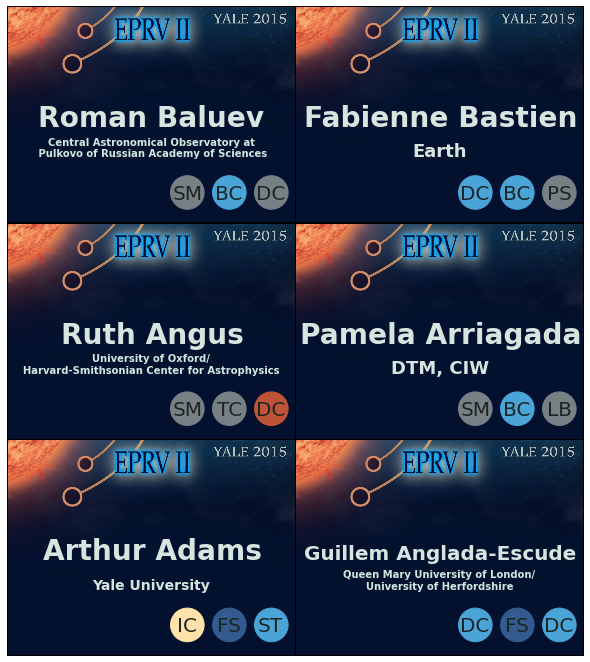

In [641]:
colors = ['#FFE2A9', '#4BA4D8', '#768085', '#BF5338', '#335B8F']
colors2 = ['#335B8F', '#BF5338', '#768085',  '#4BA4D8', '#FFE2A9']
colors3 = ['#4BA4D8', '#FFE2A9', '#BF5338', '#768085', '#335B8F']

circ_ypos = 775
name_dict = {'family': 'YaleNew-Roman',
             'color': '#D6E8E1',
             'weight': 'bold',
             'size': 28
             }

company_dict = {'family': 'YaleNew-Roman',
                'color': '#D6E8E1',
                'weight': 'bold',
                'size': 16
                }

circle_dict = {'family': 'YaleNew-Roman',
               'color': '#1D2523',
               'weight': 'normal',
               'size': 20
               }


def change_name_size(name, name_dict):
    if len(name) < 20:
        name_dict['size'] = 28
    elif ((len(name) >= 20) and (len(name) < 30)):
        name_dict['size'] = 20
    else:
        name_dict['size'] = 16
    return name_dict
        

def change_company_size(company, company_dict):
    if len(company) < 15:
        company_dict['size'] = 18
    elif ((len(company) >= 15) and (len(company) < 30)):
        company_dict['size'] = 14
    elif ((len(company) >= 30) and (len(company) < 50)):
        company_dict['size'] = 12
    else:
        company_dict['size'] = 10
    return company_dict
    

leftarr = [0.0294, 0.5, 0.0294, 0.5, 0.0294, 0.5]
bottomarr = [0.091, 0.091, 0.364,  0.364, 0.637, 0.637]
width = 0.4706
height = 0.273

page = 0
fig = plt.figure(figsize=(8.5, 11))

for indx in range(6):
    #########################################
    #0. bottom left nametag:
    #########################################
    rect = [leftarr[indx], bottomarr[indx], width, height]
    ax = fig.add_axes(rect)
    ax.imshow(png)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #add name text:
    name = finaldf.loc[page*6 + indx].FirstName + ' ' + finaldf.loc[page*6 + indx].LastName 
    this_name_dict = change_name_size(name, name_dict)
    ax.text(600, 500, name, fontdict=this_name_dict, horizontalalignment='center')

    #add company text:
    company = finaldf.loc[page*6 + indx].Company
    this_co_dict = change_company_size(company, company_dict)
    ax.text(600, 625, company, fontdict=this_co_dict, horizontalalignment='center')

    #add circles for sessions:
    circ1 = plt.Circle((750, circ_ypos), 70, color=colors[int(finaldf.loc[page*6 + indx].PrimerID)])
    fig.gca().add_artist(circ1)
    ax.text(750, circ_ypos + 27.5, sun_ses[int(finaldf.loc[page*6 + indx].PrimerID)], fontdict=circle_dict, horizontalalignment='center')

    circ2 = plt.Circle((925, circ_ypos), 70, color=colors2[int(finaldf.loc[page*6 + indx].MonID)])
    fig.gca().add_artist(circ2)
    ax.text(925, circ_ypos + 27.5, mon_ses[int(finaldf.loc[page*6 + indx].MonID)], fontdict=circle_dict, horizontalalignment='center')

    circ3 = plt.Circle((1100, circ_ypos), 70, color=colors3[int(finaldf.loc[page*6 + indx].MonID)])
    fig.gca().add_artist(circ3)
    ax.text(1100, circ_ypos + 27.5, tue_ses[int(finaldf.loc[page*6 + indx].TueID)], fontdict=circle_dict, horizontalalignment='center')


plt.savefig('testTags_bold.png', dpi=300)
